<a href="https://colab.research.google.com/github/MohamedA2000/Machine-Learning-Projects/blob/main/Gradient_Descent_For_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.linear_model import LinearRegression

#data = pd.read_csv("univariate_linear_regression.csv") #if you upload here
dataa= 'https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv'
data = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv") #if you upload to your GitHub
data
# tmp1 = pd.read_csv(dataa, sep=',', header=0, index_col=0)
# print(tmp1.head())


,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


family history percentage
Absent     %58.44155844155844
Present    %41.55844155844156
Name: famhist, dtype: object
chd percentage
0    %65.36796536796537
1    %34.63203463203463
Name: chd, dtype: object


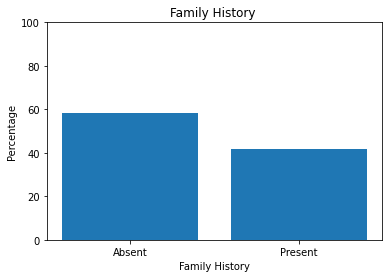

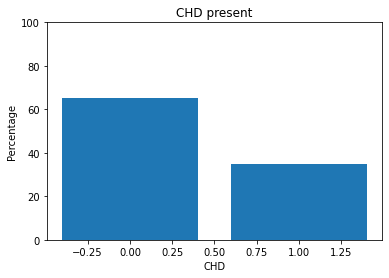

In [ ]:
famhist_split = data['famhist'].value_counts()
famhist_percentage = famhist_split / len(data['famhist']) * 100
famhist_percent_str = '%'+ famhist_percentage.astype(str) 


chd_split = data['chd'].value_counts()
chd_percentage = chd_split / len(data['chd']) * 100
chd_percent_str =  '%'+ chd_percentage.astype(str) 


print("family history percentage")
print(famhist_percent_str)
print("chd percentage")
print(chd_percent_str)

plt.bar(famhist_percentage.index, famhist_percentage.values)
plt.xlabel('Family History')
plt.ylabel('Percentage')
plt.ylim([0, 100])
plt.title('Family History ')
plt.show()


plt.bar(chd_percentage.index, chd_percentage.values)
plt.xlabel('CHD')
plt.ylabel('Percentage')
plt.ylim([0, 100])
plt.title('CHD present')
x_labels = ['0', '1']
plt.show()

In [ ]:
missing_values = data.isna().sum()
print("These are all the missing values")
print(missing_values)

These are all the missing values
row.names    0
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64


The only categorial feature in our features is family history. This is because "Present" and "Absent" are the only possible values for the famhist feature and so it is considered a categorical feature. The rest would be numerical or continious features 

In [ ]:
import pandas as pd
import numpy as np

# rs = np.random.RandomState(0)
# df = pd.DataFrame(rs.rand(10, 10))
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,row.names,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
row.names,1.000000,0.171583,-0.044813,-0.064014,0.033851,-0.147769,-0.026758,0.088825,-0.014064,-0.063808
sbp,0.171583,1.000000,0.212247,0.158296,0.356500,-0.057454,0.238067,0.140096,0.388771,0.192354
tobacco,-0.044813,0.212247,1.000000,0.158905,0.286640,-0.014608,0.124529,0.200813,0.450330,0.299718
ldl,-0.064014,0.158296,0.158905,1.000000,0.440432,0.044048,0.330506,-0.033403,0.311799,0.263053
adiposity,0.033851,0.356500,0.286640,0.440432,1.000000,-0.043144,0.716556,0.100330,0.625954,0.254121
typea,-0.147769,-0.057454,-0.014608,0.044048,-0.043144,1.000000,0.074006,0.039498,-0.102606,0.103156
obesity,-0.026758,0.238067,0.124529,0.330506,0.716556,0.074006,1.000000,0.051620,0.291777,0.100095
alcohol,0.088825,0.140096,0.200813,-0.033403,0.100330,0.039498,0.051620,1.000000,0.101125,0.062531
age,-0.014064,0.388771,0.450330,0.311799,0.625954,-0.102606,0.291777,0.101125,1.000000,0.372973
chd,-0.063808,0.192354,0.299718,0.263053,0.254121,0.103156,0.100095,0.062531,0.372973,1.000000


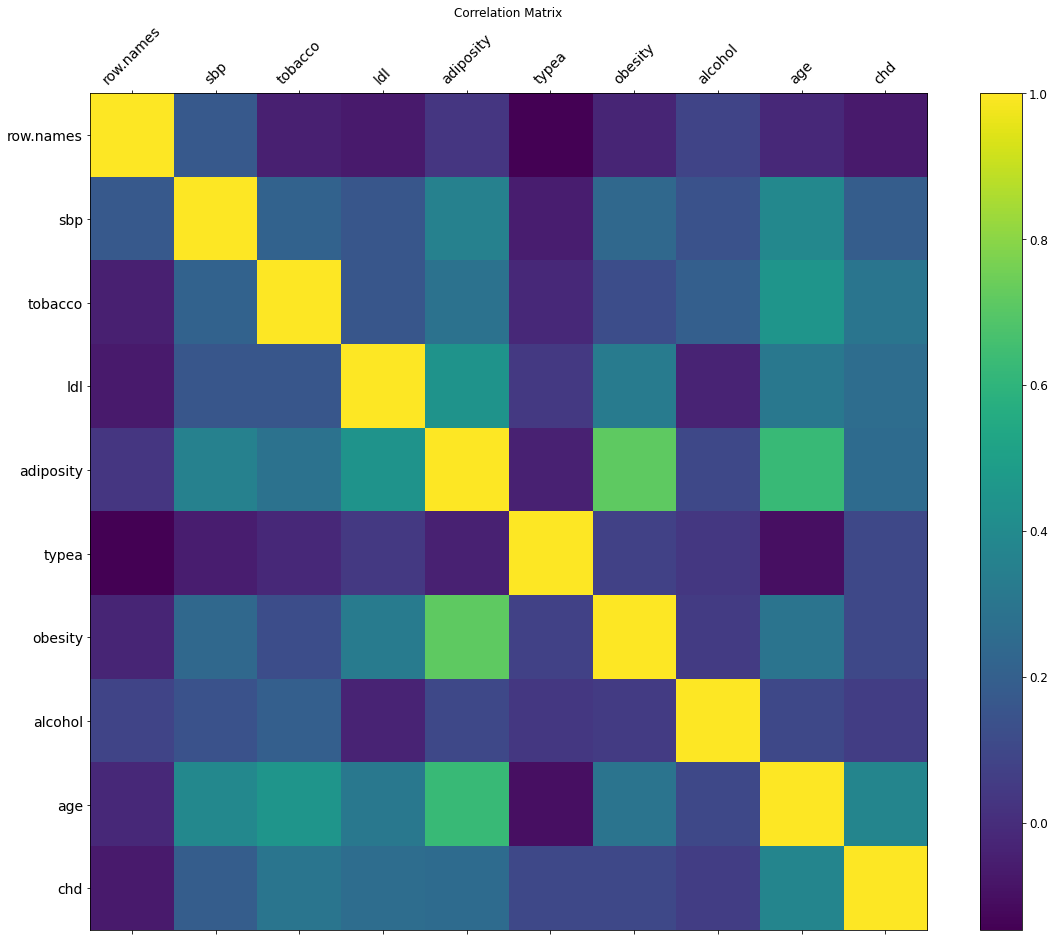

In [ ]:
f = plt.figure(figsize=(19, 15))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
plt.title('Correlation Matrix', fontsize=12);

In [ ]:
import pandas as pd

# Calculate the correlation matrix
corr_matrix = data.corr()

# Get the absolute values of the correlations
corr_matrix = abs(corr_matrix)

# Set the diagonal values to 0
for i in range(corr_matrix.shape[0]):
    corr_matrix.iloc[i, i] = 0

# Get the maximum value for each row in the correlation matrix
max_correlation = corr_matrix.max()

# Sort the values in descending order
max_correlation = max_correlation.sort_values(ascending=False)

# Get the index of the sorted values (i.e., the names of the features)
max_correlated_features = max_correlation

# Print the feature names
print("The features below are printed from the maximum corrolation, to the least")
print(max_correlated_features)





The features below are printed from the maximum corrolation, to the least
adiposity    0.716556
obesity      0.716556
age          0.625954
tobacco      0.450330
ldl          0.440432
sbp          0.388771
chd          0.372973
alcohol      0.200813
row.names    0.171583
typea        0.147769
dtype: float64


Judging from the results above, **adiposity** and **obesity** have the maximum corrolation

In [ ]:
# Use get_dummies to perform one-hot encoding on the 'famhist' column
dummy_one= pd.get_dummies(data, columns=['famhist'])
print(dummy_one)

     row.names  sbp  tobacco    ldl  adiposity  typea  obesity  alcohol  age  \
0            1  160    12.00   5.73      23.11     49    25.30    97.20   52   
1            2  144     0.01   4.41      28.61     55    28.87     2.06   63   
2            3  118     0.08   3.48      32.28     52    29.14     3.81   46   
3            4  170     7.50   6.41      38.03     51    31.99    24.26   58   
4            5  134    13.60   3.50      27.78     60    25.99    57.34   49   
..         ...  ...      ...    ...        ...    ...      ...      ...  ...   
457        459  214     0.40   5.98      31.72     64    28.45     0.00   58   
458        460  182     4.20   4.41      32.10     52    28.61    18.72   52   
459        461  108     3.00   1.59      15.23     40    20.09    26.64   55   
460        462  118     5.40  11.61      30.79     64    27.35    23.97   40   
461        463  132     0.00   4.82      33.41     62    14.70     0.00   46   

     chd  famhist_Absent  famhist_Prese

In [ ]:
import pandas as pd
import numpy as np

# load data into a DataFrame
data_standardized = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv")

# specify the categorical column
categorical_col = "famhist"
dropThis_col = "row.names"

# one-hot encode the categorical column
dummy = pd.get_dummies(data[categorical_col], prefix=categorical_col)

# drop the original categorical column
data_standardized  = data_standardized.drop(categorical_col, axis=1)
data_standardized  = data_standardized.drop(dropThis_col, axis=1)


# combine the one-hot encoded categorical data with the original data
data_standardized  = pd.concat([data_standardized, dummy], axis=1)

# separate the categorical and non-categorical columns
categorical_data = data_standardized [dummy.columns]
non_categorical_data = data_standardized .drop(dummy.columns, axis=1)

non_categorical_data = non_categorical_data.drop("chd", axis=1)

# standardize the non-categorical data
non_categorical_data = (non_categorical_data - non_categorical_data.mean()) / non_categorical_data.std()

non_categorical_data["chd"] = data_standardized["chd"]

# combine the categorical and standardized non-categorical data
data_standardized = pd.concat([categorical_data, non_categorical_data], axis=1)
data_standardized

,famhist_Absent,famhist_Present,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
0,0,1,1.057417,1.821099,0.477894,-0.295183,-0.418017,-0.176594,3.274189,0.628654,1
1,1,0,0.276789,-0.789382,-0.159507,0.411694,0.193134,0.670646,-0.612081,1.381617,1
2,0,1,-0.991731,-0.774141,-0.608585,0.883374,-0.112441,0.734723,-0.540597,0.217947,0
3,0,1,1.545310,0.841352,0.806252,1.622382,-0.214300,1.411091,0.294742,1.039361,1
4,0,1,-0.211103,2.169453,-0.598928,0.305020,0.702427,-0.012842,1.645991,0.423301,1
...,...,...,...,...,...,...,...,...,...,...,...
457,1,0,3.692037,-0.704470,0.598614,0.811401,1.109862,0.570971,-0.696228,1.039361,0
458,1,0,2.130781,0.122871,-0.159507,0.860240,-0.112441,0.608942,0.068445,0.628654,1
459,1,0,-1.479624,-0.138395,-1.521228,-1.307946,-1.334744,-1.413043,0.391960,0.834008,0
460,1,0,-0.991731,0.384137,3.317227,0.691875,1.109862,0.309916,0.282897,-0.192760,0


In [ ]:
data_standardized = data_standardized.drop('famhist_Absent', axis=1)
data_standardized

,famhist_Present,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
0,1,1.057417,1.821099,0.477894,-0.295183,-0.418017,-0.176594,3.274189,0.628654,1
1,0,0.276789,-0.789382,-0.159507,0.411694,0.193134,0.670646,-0.612081,1.381617,1
2,1,-0.991731,-0.774141,-0.608585,0.883374,-0.112441,0.734723,-0.540597,0.217947,0
3,1,1.545310,0.841352,0.806252,1.622382,-0.214300,1.411091,0.294742,1.039361,1
4,1,-0.211103,2.169453,-0.598928,0.305020,0.702427,-0.012842,1.645991,0.423301,1
...,...,...,...,...,...,...,...,...,...,...
457,0,3.692037,-0.704470,0.598614,0.811401,1.109862,0.570971,-0.696228,1.039361,0
458,0,2.130781,0.122871,-0.159507,0.860240,-0.112441,0.608942,0.068445,0.628654,1
459,0,-1.479624,-0.138395,-1.521228,-1.307946,-1.334744,-1.413043,0.391960,0.834008,0
460,0,-0.991731,0.384137,3.317227,0.691875,1.109862,0.309916,0.282897,-0.192760,0


In [ ]:
data_standardized

,famhist_Present,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
0,1,1.057417,1.821099,0.477894,-0.295183,-0.418017,-0.176594,3.274189,0.628654,1
1,0,0.276789,-0.789382,-0.159507,0.411694,0.193134,0.670646,-0.612081,1.381617,1
2,1,-0.991731,-0.774141,-0.608585,0.883374,-0.112441,0.734723,-0.540597,0.217947,0
3,1,1.545310,0.841352,0.806252,1.622382,-0.214300,1.411091,0.294742,1.039361,1
4,1,-0.211103,2.169453,-0.598928,0.305020,0.702427,-0.012842,1.645991,0.423301,1
...,...,...,...,...,...,...,...,...,...,...
457,0,3.692037,-0.704470,0.598614,0.811401,1.109862,0.570971,-0.696228,1.039361,0
458,0,2.130781,0.122871,-0.159507,0.860240,-0.112441,0.608942,0.068445,0.628654,1
459,0,-1.479624,-0.138395,-1.521228,-1.307946,-1.334744,-1.413043,0.391960,0.834008,0
460,0,-0.991731,0.384137,3.317227,0.691875,1.109862,0.309916,0.282897,-0.192760,0


SKLEARN LOGISTIC REGRESSION IS HERE 

In [ ]:
from sklearn.linear_model import LogisticRegression


model= LogisticRegression()

x = data_standardized.iloc[:, :-1] # All columns except the last one
y = data_standardized.iloc[:, -1] # The target heart disease

model.fit(x,y)

print(model.coef_)
print("Accuracy:", model.intercept_)

[[ 0.88060142  0.13249594  0.36074563  0.35615923  0.14242442  0.37964323
  -0.25524232  0.00443547  0.64963333]]
Accuracy: [-1.23623307]


In [ ]:

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = 3
result = sigmoid(z)

print(result)

0.9525741268224334


In [ ]:
def costFunction(theta, X, y):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    loss = -np.sum(y * np.log(h) + (1 - y) * np.log(1 - h)) / m
    return loss


Initialziing random theta coefficents to see if it is working as intended before continiing to gradient descent

In [ ]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def batch_gradient_descent(X, y, thetas, alpha, num_iters):
    m = X.shape[0]
    #  gradient descent for the specified number of iterations
    for i in range(num_iters):
      # calculating the hypothesis
        z = X @ thetas
        h = sigmoid(z)
        # error and gradient calculations
        error = h - y
        gradient = X.T @ error / m
        # Update the weights using the gradient and learning rate
        thetas = thetas - alpha * gradient
    return thetas

# Sample input data
X = np.array([[1, 3, 5], [7, 9, 11], [13, 15, 17]])
y = np.array([1, 3, 5])

# Initialize the weights (thetas)
thetas = np.zeros(X.shape[1])

# learning rate 
alpha = 0.01

#iterations
num_iters = 10

# Call the batch_gradient_descent function
thetas = batch_gradient_descent(X, y, thetas, alpha, num_iters)

# Print the updated weights (thetas)
print(thetas)


[2.23518721 2.64555287 3.05591853]


In [ ]:
import random
# random.seed(10)
theta = [random.uniform(0, 1) for i in range(10)]
print(theta)


[0.42486519469095096, 0.46660118865813616, 0.449215126209923, 0.4100107182695788, 0.7463931194514548, 0.510526789105213, 0.7128036827365173, 0.8726295377080668, 0.023432974062258305, 0.4764283562416989]


Batch Gradient Descent

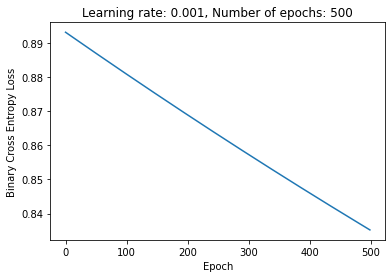

[ 0.6447689  -0.01543158  0.59683894  0.73913455  0.47728517  0.1697252
  0.20703369  0.68214276  0.14560333  0.08276687]


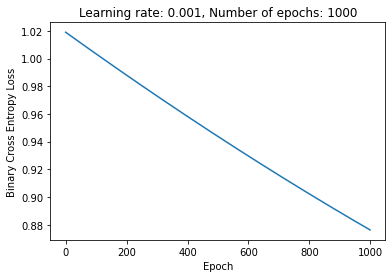

[ 0.4092592   0.83876463 -0.01926654  0.48627283  0.7500221   0.4818483
  0.6912628   0.16337117  0.81866261  0.65218356]


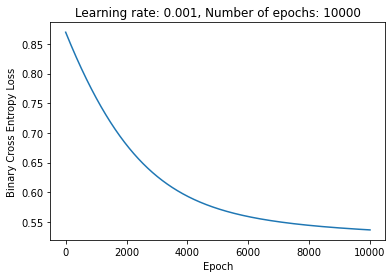

[-0.59148982  0.02836023  0.14278978  0.42845849  0.35283142  0.02820171
  0.38479385 -0.08154236  0.08248392  0.54696765]


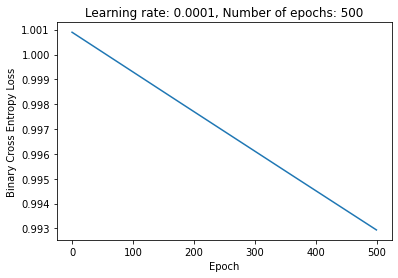

[0.79061096 0.51623451 0.90371608 0.31946047 0.08980798 0.29395907
 0.11637443 0.82059179 0.04513245 0.62293405]


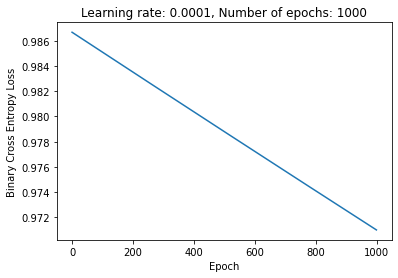

[0.52113269 0.80874159 0.19471816 0.85366722 0.34651847 0.73841383
 0.29734942 0.86484547 0.31817514 0.16059163]


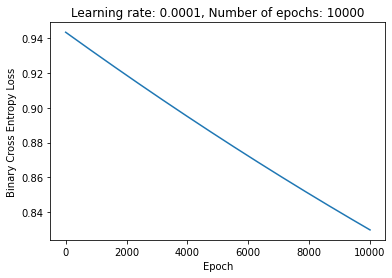

[0.19741816 0.0422491  0.729315   0.16897441 0.34472784 0.80451155
 0.92094463 0.29361871 0.71853246 0.23423877]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))
    

def binary_cross_entropy_loss(h, y):
    return -(y * np.log(h) + (1 - y) * np.log(1 - h)).mean()

def logistic_regression(X, y, alpha, num_epochs):
    theta = np.random.rand(X.shape[1])
    # empty list to store loss for each epoch
    loss_history = []
    
    #gradient descent 
    for epoch in range(num_epochs):
        z = X.dot(theta)
        h = sigmoid(z)
        #calculaute the loss
        loss = binary_cross_entropy_loss(h, y)
        #appends value above to our list, every epoch
        loss_history.append(loss)
        
        # Calculate the gradient and update the weights
        gradient = X.T.dot(h - y) / y.size
        #subtract product of learning rate and gradient from theta weights 
        # to minimize loss values
        theta -= alpha * gradient
        
    return theta, loss_history


# set a seed for randomization (not sure if needed now, as i went another route
# but kept it just in case)
np.random.seed(10)


X = data_standardized.iloc[:, :-1] # All columns except the last one
X = np.c_[np.ones(X.shape[0]), X] # add column of 1's for intercept 
y = data_standardized.iloc[:, -1] # The target heart disease

# define the learning rates and epochs
learning_rates = [0.001, 0.0001]
epochs = [500, 1000, 10000]

# loop through the learning rates and epochs to plot the graphs
for lr in learning_rates:
    for epoch in epochs:
# Calls the logistic_regression function to optimize 
# the weights to be able to plot
        theta, loss_history = logistic_regression(X, y, alpha=lr, num_epochs=epoch)
        plt.plot(loss_history)
        plt.xlabel("Epoch")
        plt.ylabel("Binary Cross Entropy Loss")
        plt.title("Learning rate: {}, Number of epochs: {}".format(lr, epoch))
        plt.show()
        print(theta)


For batch gradient descent, If we set the learning rate to 0.001, we can halt the training process once the slope of the cost function begins to level off, typically after 10,000 iterations. However, if the learning rate is 0.0001, we need to extend the number of iterations beyond 10,000 as the algorithm is learning at a slower pace, meaning that the slope of the cost function is still too steep.

---

Mini Batch Gradient descent

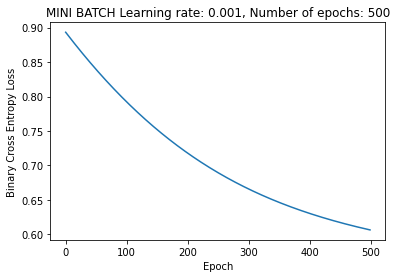

[-0.08341541 -0.14237192  0.36970021  0.64966799  0.38172023 -0.06186138
  0.24303068  0.24491954  0.02566695  0.16010115]


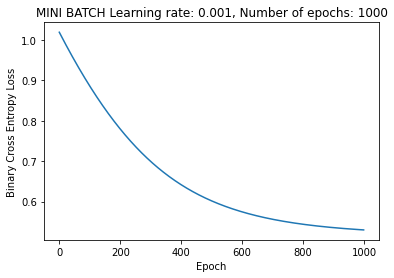

[-0.72804338  0.44776083  0.03021813  0.35730455  0.46505946  0.12464408
  0.42645372 -0.22026848  0.20794006  0.55641807]


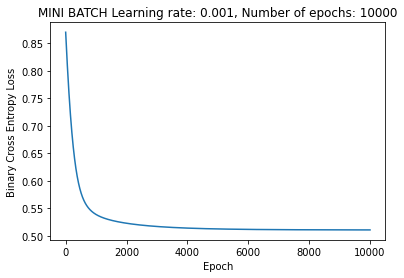

[-1.22372631  0.86124716  0.13101655  0.35995529  0.36274846  0.12637473
  0.38597057 -0.25025551  0.00599298  0.66995811]


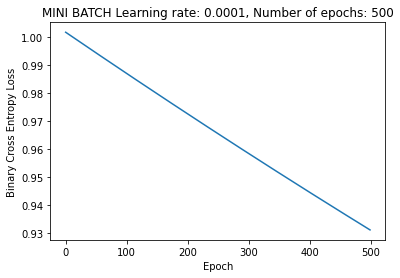

[0.67316988 0.4731781  0.86294214 0.321276   0.08516168 0.2401793
 0.13528224 0.75527367 0.03127291 0.59641907]


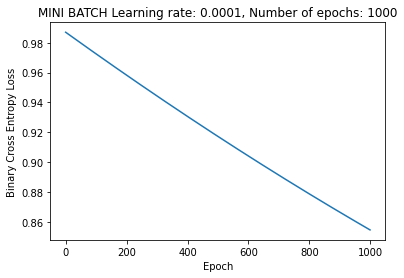

[0.31386473 0.72694452 0.16269364 0.82631059 0.30724614 0.61235609
 0.30590751 0.71364182 0.25991514 0.12963334]


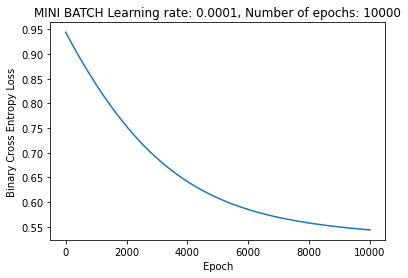

[-0.59849875  0.02582316  0.28190619  0.30492488  0.30759372  0.36454825
  0.49348995 -0.2770358   0.14142425  0.37472419]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def binary_cross_entropy_loss(h, y):
    return -(y * np.log(h) + (1 - y) * np.log(1 - h)).mean()

def logistic_regression(X, y, alpha, num_epochs, batch_size):
    #The learned weights of the logistic regression model
    theta = np.random.rand(X.shape[1])
    #contains the loss value for each epoch during training
    loss_history = []

    # split the input data and target labels into mini-batches
    num_batches = int(np.ceil(y.size / batch_size))
    batches_X = np.array_split(X, num_batches)
    batches_y = np.array_split(y, num_batches)

    for epoch in range(num_epochs):
        epoch_loss = 0
        for i in range(num_batches):
            z = batches_X[i].dot(theta)
            h = sigmoid(z)
            #calculautes the loss of epoch and adds it to overall batch loss
            batch_loss = binary_cross_entropy_loss(h, batches_y[i])
            epoch_loss += batch_loss
      # calculates gradient of loss function based on the model's weights for 
      # each batch. computes the dot product between the transpose of the input
      # and batch loss
            gradient = batches_X[i].T.dot(h - batches_y[i]) / batch_size
            #subtract product of learning rate and gradient from theta weights 
            # to minimize loss values
            theta -= alpha * gradient

     # append the loss for the epoch to the loss history
        loss_history.append(epoch_loss / num_batches)

    return theta, loss_history


# set a seed for randomization (not sure if needed now, as i went another route
# but kept it just in case)
np.random.seed(10)


X = data_standardized.iloc[:, :-1] # All columns except the last one
X = np.c_[np.ones(X.shape[0]), X] # add column of 1's for intercept term
y = data_standardized.iloc[:, -1] # The last column

# Define the learning rates and epochs
learning_rates = [0.001, 0.0001]
epochs = [500, 1000, 10000]

# Loop through the learning rates and epochs to plot the graphs
for lr in learning_rates:
    for epoch in epochs:
        #runs logistic regression function with input, target, alpha, epoch 
        #and batch size
        theta, loss_history = logistic_regression(X, y, alpha=lr, num_epochs=epoch,batch_size=50)
        plt.plot(loss_history)
        plt.xlabel("Epoch")
        plt.ylabel("Binary Cross Entropy Loss")
        plt.title("MINI BATCH Learning rate: {}, Number of epochs: {}".format(lr, epoch))
        plt.show()
        print(theta)


If we set the learning rate to 0.001, we can stop the training process once the slope of the cost function begins to level off, which seems to happen once 1,000 iterations has been achieved. However, if the learning rate is 0.0001, we need to extend the number of iterations to greater than 10,000 since the algorithm is learning at a slower pace, implying that the slope of the cost function is still excessively steep. By updating the weights in small batches, the algorithm can converge faster than using the entire dataset for each update.

A comparison of the skLearn algoririthin and my own. it seems as though mine seems to start a bit different than the sklearn algorithim unfourtunately, but closely matches it as it continies.

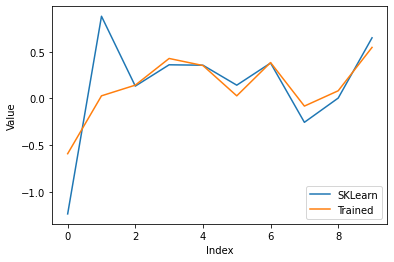

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create the two arrays
sk = np.array([-1.23623307, 0.88060142, 0.13249594, 0.36074563, 0.35615923, 0.14242442, 0.37964323, -0.25524232, 0.00443547, 0.64963333])

#index #'s for batch gradient descent; learning rate=0.001, epoch=10,000
trained = np.array([-0.59148982 ,  0.02836023,  0.14278978,  0.42845849, 0.35283142 , 0.02820171,
  0.38479385,  -0.08154236,  0.08248392,   0.54696765])



# Create an array of index numbers
index = np.arange(len(sk))

# Create the line plot
plt.plot(index, sk,  label='SKLearn')
plt.plot(index, trained, label='Trained')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()
